<a href="https://colab.research.google.com/github/WKR01/PUM/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import absolute

from matplotlib import pyplot

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor

In [6]:
#load data
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
X = pd.DataFrame(data = housing.data, columns = housing.feature_names)
print(X.head())
y=housing.target

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [26]:

models = {
    'Liniowa': Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', LinearRegression())
    ]),
    'Wielomianowa 2 stopnia': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('scaler', MinMaxScaler()),
        ('regressor', LinearRegression())
    ]),
    'Wielomianowa 3 stopnia': Pipeline([
        ('poly', PolynomialFeatures(degree=3)),
        ('scaler', MinMaxScaler()),
        ('regressor', LinearRegression())
    ]),
    'Regresja KNN': Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', KNeighborsRegressor())
    ])
}



K-NN Regression
K-NN Regression


In [27]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

results = {}
for name, model in models.items():
    print(name)
    print(model)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    results[name] = scores

    print(scores)

Liniowa
Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', LinearRegression())])
[-0.55900192 -0.5531233  -0.48116128 -0.57420367 -0.48897584 -0.52838818
 -0.55117824 -0.47483961 -0.56436922 -0.55002537 -0.52419071 -0.50990826
 -0.4927451  -0.52187232 -0.57684496 -0.51097303 -0.54946916 -0.53063968
 -0.5354776  -0.53062219 -0.54412356 -0.582244   -0.50813223 -0.51750348
 -0.53175369 -0.51408439 -0.50993089 -0.49984912 -0.53555974 -0.53200145]
Wielomianowa 2 stopnia
Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', MinMaxScaler()),
                ('regressor', LinearRegression())])
[-4.90242539e-01 -4.76788098e-01 -4.04549060e-01 -4.90241382e-01
 -4.00722113e-01 -4.75368048e-01 -8.18323275e+02 -3.74832352e-01
 -5.26787446e-01 -4.71672622e-01 -4.71290701e-01 -4.23470763e-01
 -2.31827432e+01 -7.26810840e+00 -4.98549693e-01 -4.23719648e-01
 -4.43404988e-01 -4.38878615e-01 -4.58514306e-01 -4.73615620e-01
 -5.25832614e-01 -1.82265821e+01 -4.27346725e-01 -4.05385587e-01
 -3.7

{'Liniowa': array([-0.55900192, -0.5531233 , -0.48116128, -0.57420367, -0.48897584,
       -0.52838818, -0.55117824, -0.47483961, -0.56436922, -0.55002537,
       -0.52419071, -0.50990826, -0.4927451 , -0.52187232, -0.57684496,
       -0.51097303, -0.54946916, -0.53063968, -0.5354776 , -0.53062219,
       -0.54412356, -0.582244  , -0.50813223, -0.51750348, -0.53175369,
       -0.51408439, -0.50993089, -0.49984912, -0.53555974, -0.53200145]), 'Wielomianowa 2 stopnia': array([-4.90242539e-01, -4.76788098e-01, -4.04549060e-01, -4.90241382e-01,
       -4.00722113e-01, -4.75368048e-01, -8.18323275e+02, -3.74832352e-01,
       -5.26787446e-01, -4.71672622e-01, -4.71290701e-01, -4.23470763e-01,
       -2.31827432e+01, -7.26810840e+00, -4.98549693e-01, -4.23719648e-01,
       -4.43404988e-01, -4.38878615e-01, -4.58514306e-01, -4.73615620e-01,
       -5.25832614e-01, -1.82265821e+01, -4.27346725e-01, -4.05385587e-01,
       -3.77965731e+01, -4.06867786e-01, -4.10022688e-01, -4.45621345e-01,
   

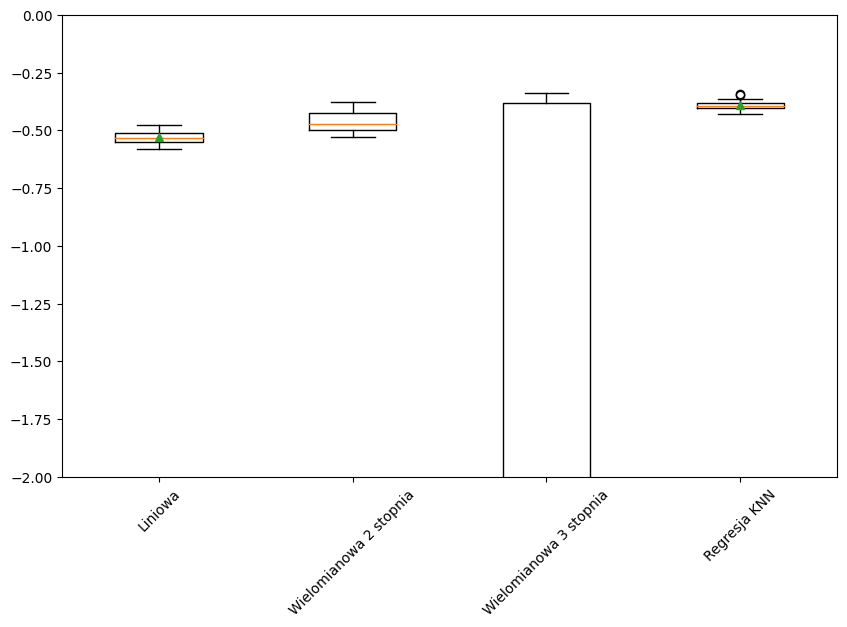

In [31]:
print(results)
pyplot.figure(figsize=(10, 6))
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.xticks(rotation=45)
pyplot.ylim(-2, 0)
#pyplot.ylabel('Średni błąd')
pyplot.show()

Mean MAE: -0.532


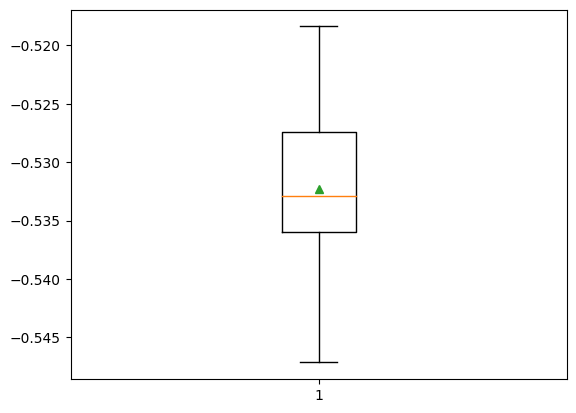

In [33]:
model = TransformedTargetRegressor(regressor=LinearRegression())
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
scores_tv=cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores=absolute(scores_tv)
s_mean=mean(scores_tv)
print('Mean MAE: %.3f' % (s_mean))

pyplot.boxplot(scores_tv,showmeans=True)
pyplot.show()